In [12]:
import pandas as pd

In [13]:
df = pd.read_excel('/kaggle/input/og-fake-data/OGFAKE DATA.xlsx')

In [14]:
df = df.dropna()

In [15]:
df['status'].value_counts()

status
ACCEPTED    12944
REJECTED     9535
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22479 entries, 0 to 28308
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              22479 non-null  object 
 1   experience          22479 non-null  float64
 2   present_ctc         22479 non-null  float64
 3   expected_ctc        22479 non-null  float64
 4   notice_period       22479 non-null  int64  
 5   candidate_profiles  22479 non-null  object 
 6   job_categories      22479 non-null  object 
 7   designation         22479 non-null  object 
 8   job_id              22479 non-null  int64  
 9   exp_min             22479 non-null  float64
 10  exp_max             22479 non-null  float64
 11  ctc_fixed_min       22479 non-null  float64
 12  ctc_fixed_max       22479 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 2.4+ MB


In [17]:
def fix_ctc_values(df1):
    def fix_ctc_lpa(x):
        if x > 1000:
            return x/100000
        else:
            return x

    df1['expected_ctc'] = df1['expected_ctc'].apply(fix_ctc_lpa)
    df1['present_ctc'] = df1['present_ctc'].apply(fix_ctc_lpa)
    return df1

fix_ctc_values(df)

,status,experience,present_ctc,expected_ctc,notice_period,candidate_profiles,job_categories,designation,job_id,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max
0,REJECTED,2.00,3.60,4.14,15,Developer Operations,"Inside Sales (Outbound),Sales",Financial Analyst,14,0.5,3.0,3.0,5.0
1,REJECTED,11.00,3.00,4.00,1,Curriculum Designer,"Inside Sales (Outbound),Sales",Accountant,14,0.5,3.0,3.0,5.0
2,REJECTED,2.50,5.00,5.75,15,Software Engineer,Frontend Developer,Sales Executive,3,2.0,4.0,6.0,10.0
3,REJECTED,4.08,7.00,8.05,15,Media Producer,Frontend Developer,Client Relations Manager,3,2.0,4.0,6.0,10.0
4,REJECTED,3.50,4.00,8.00,1,HR Specialist,Developer Operations,Project Coordinator,4,1.0,5.0,6.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,ACCEPTED,5.50,8.45,11.00,15,Area Sales Executive|||Sales Executive|||Sales...,Business development,Team Lead (Mumbai),3527,3.0,5.5,7.0,11.0
28305,ACCEPTED,3.67,6.00,8.00,15,Team Lead,Business development,Team Lead (Mumbai),3527,3.0,5.5,7.0,11.0
28306,ACCEPTED,5.50,6.65,9.00,1,Area Sales Manager|||Business Development Exec...,Business development,Team Lead (Mumbai),3527,3.0,5.5,7.0,11.0
28307,ACCEPTED,5.00,6.20,8.50,1,Business Development Associate|||Business Deve...,Business development,Team Lead (Mumbai),3527,3.0,5.5,7.0,11.0


In [18]:
import re

def clean_text_columns(df):
    columns = ['candidate_profiles', 'designation']
    clean_pattern = r'[!@#$%^&*()_+{}\[\-]:;<>,.?~\\/|"]'
    for col in columns:
        df[col] = df[col].apply(lambda x: re.sub(clean_pattern, ' ', str(x)))
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True).str.strip()
        df[col] = df[col].str.lower()  # Convert to lowercase
    return df

clean_text_columns(df)

,status,experience,present_ctc,expected_ctc,notice_period,candidate_profiles,job_categories,designation,job_id,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max
0,REJECTED,2.00,3.60,4.14,15,developer operations,"Inside Sales (Outbound),Sales",financial analyst,14,0.5,3.0,3.0,5.0
1,REJECTED,11.00,3.00,4.00,1,curriculum designer,"Inside Sales (Outbound),Sales",accountant,14,0.5,3.0,3.0,5.0
2,REJECTED,2.50,5.00,5.75,15,software engineer,Frontend Developer,sales executive,3,2.0,4.0,6.0,10.0
3,REJECTED,4.08,7.00,8.05,15,media producer,Frontend Developer,client relations manager,3,2.0,4.0,6.0,10.0
4,REJECTED,3.50,4.00,8.00,1,hr specialist,Developer Operations,project coordinator,4,1.0,5.0,6.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,ACCEPTED,5.50,8.45,11.00,15,area sales executive|||sales executive|||sales...,Business development,team lead (mumbai),3527,3.0,5.5,7.0,11.0
28305,ACCEPTED,3.67,6.00,8.00,15,team lead,Business development,team lead (mumbai),3527,3.0,5.5,7.0,11.0
28306,ACCEPTED,5.50,6.65,9.00,1,area sales manager|||business development exec...,Business development,team lead (mumbai),3527,3.0,5.5,7.0,11.0
28307,ACCEPTED,5.00,6.20,8.50,1,business development associate|||business deve...,Business development,team lead (mumbai),3527,3.0,5.5,7.0,11.0


In [19]:
df.shape

(22479, 13)

In [20]:
df.columns

Index(['status', 'experience', 'present_ctc', 'expected_ctc', 'notice_period',
       'candidate_profiles', 'job_categories', 'designation', 'job_id',
       'exp_min', 'exp_max', 'ctc_fixed_min', 'ctc_fixed_max'],
      dtype='object')

In [21]:
import numpy as np

# Replace 'nan' with actual NaN representation recognized by pandas
df.replace('nan', np.nan, inplace=True)

# Drop rows with NaN values
df = df.dropna()

# Check the shape of X_cleaned after dropping NaN values
print(df.shape)

(22479, 13)


In [22]:
!pip install --quiet -U sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
model = SentenceTransformer("llmrails/ember-v1")

In [24]:
def make_embeddings(X):
    similarity = []

    for index, row in X.iterrows():
        job_embeddings = model.encode(row['designation'], show_progress_bar=False)
        candidate_embeddings = model.encode(row['candidate_profiles'], show_progress_bar=False)

        # Cosine Similarity
        cosine_sim = cosine_similarity([candidate_embeddings], [job_embeddings])[0][0]

        # Append to list
        similarity.append(cosine_sim)
        
        # Set 'profile_relevance' value for the current row
        X.loc[index, 'profile_relevance'] = cosine_sim

    return X['profile_relevance']

make_embeddings(df)

0        0.480256
1        0.437798
2        0.585832
3        0.581464
4        0.537166
           ...   
28304    0.518949
28305    0.851072
28306    0.508323
28307    0.571046
28308    0.448481
Name: profile_relevance, Length: 22479, dtype: float64

In [25]:
# Define the numeric features and scale them
numeric_features = ['experience', 'present_ctc', 'expected_ctc', 'notice_period', 'exp_min', 'exp_max', 'ctc_fixed_min', 'ctc_fixed_max']
   
# Concatenate the scaled numeric features with 'profile_relevance'
X= pd.concat([df['profile_relevance'].reset_index(),df[numeric_features],df['status']], axis=1)
X= X.iloc[:, 1:]
X.columns = X.columns.astype(str)
X.sample(10)

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max,status
20537,0.631359,15.00,4.32,6.00,0.0,5.0,10.0,6.5,7.5,ACCEPTED
9575,0.537552,5.42,6.85,7.88,15.0,3.5,7.0,8.0,9.0,ACCEPTED
12185,0.881442,16.00,19.80,35.00,15.0,8.0,12.0,15.0,33.0,REJECTED
4621,0.440190,0.58,4.00,4.60,15.0,0.5,5.0,4.0,6.5,ACCEPTED
16710,0.684304,8.50,20.00,30.00,30.0,4.0,6.0,15.0,25.0,ACCEPTED
5835,0.760256,3.50,6.00,6.90,15.0,0.5,3.0,4.0,7.0,REJECTED
15386,1.000000,2.00,12.00,22.00,45.0,1.0,8.0,15.0,50.0,ACCEPTED
14479,0.583902,3.42,7.00,9.00,30.0,3.0,5.0,10.0,12.0,ACCEPTED
12528,0.808018,3.00,10.00,15.00,30.0,1.0,5.0,15.0,30.0,ACCEPTED
19908,0.694446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df[numeric_features]

,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max
0,2.00,3.60,4.14,15,0.5,3.0,3.0,5.0
1,11.00,3.00,4.00,1,0.5,3.0,3.0,5.0
2,2.50,5.00,5.75,15,2.0,4.0,6.0,10.0
3,4.08,7.00,8.05,15,2.0,4.0,6.0,10.0
4,3.50,4.00,8.00,1,1.0,5.0,6.0,10.0
...,...,...,...,...,...,...,...,...
28304,5.50,8.45,11.00,15,3.0,5.5,7.0,11.0
28305,3.67,6.00,8.00,15,3.0,5.5,7.0,11.0
28306,5.50,6.65,9.00,1,3.0,5.5,7.0,11.0
28307,5.00,6.20,8.50,1,3.0,5.5,7.0,11.0


In [27]:
X.sample(5)

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max,status
17166,0.619594,2.0,8.40,15.00,60.0,2.0,4.0,15.0,25.0,ACCEPTED
10660,0.569352,3.0,5.50,8.00,30.0,2.0,4.0,7.0,11.0,REJECTED
10355,0.698688,2.5,3.00,3.45,30.0,2.0,5.0,3.5,6.0,REJECTED
16852,0.734429,7.0,4.72,6.50,15.0,3.0,6.0,5.0,8.5,REJECTED
26816,NaN,9.0,3.60,3.60,0.0,2.5,3.6,1.0,3.0,ACCEPTED


In [29]:
X.shape

(24937, 10)

In [30]:
# Replace 'nan' with actual NaN representation recognized by pandas in X
X.replace('nan', np.nan, inplace=True)

# Remove rows with NaN values
X = X.dropna(inplace=False)

# Check the shape of X_cleaned after dropping NaN values
print(X.shape)

(20021, 10)


In [31]:
X.sample(5)

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max,status
18608,0.579716,6.50,6.5,9.0,30.0,3.0,9.0,7.0,11.0,REJECTED
6812,0.847655,2.50,13.8,20.0,30.0,3.0,5.0,15.0,30.0,ACCEPTED
15560,0.487385,2.06,3.6,4.2,30.0,5.0,15.0,7.0,18.0,ACCEPTED
18305,0.773565,4.40,22.0,28.0,7.0,2.0,5.0,25.0,40.0,ACCEPTED
9578,0.777575,5.60,12.0,17.0,45.0,3.0,7.0,15.0,45.0,ACCEPTED


In [36]:
X.duplicated().sum()

0

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

## Feature Selection- With Pearson Correlation

In [37]:
# Encode the target variable into numeric format
from sklearn.preprocessing import LabelEncoder

# Encode the target variable into numeric format
label_encoder = LabelEncoder()
X['status'] = label_encoder.fit_transform(X['status'])

# Reverse the encoding
X['status'] = 1 - X['status']

In [39]:
X['status'].nunique()

2

In [40]:
X.head()

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max,status
0,0.480256,2.00,3.6,4.14,15.0,0.5,3.0,3.0,5.0,0
1,0.437798,11.00,3.0,4.00,1.0,0.5,3.0,3.0,5.0,0
2,0.585832,2.50,5.0,5.75,15.0,2.0,4.0,6.0,10.0,0
3,0.581464,4.08,7.0,8.05,15.0,2.0,4.0,6.0,10.0,0
4,0.537166,3.50,4.0,8.00,1.0,1.0,5.0,6.0,10.0,0


In [38]:
X.corr()

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max,status
profile_relevance,1.000000,0.001106,0.022978,0.027623,-0.004099,0.008886,-0.002915,-0.001390,-0.001375,0.039091
experience,0.001106,1.000000,0.341895,0.322153,-0.007211,0.530394,0.533550,-0.005133,-0.005063,-0.036790
present_ctc,0.022978,0.341895,1.000000,0.856503,0.005495,0.397038,0.298239,0.000650,0.000928,0.001837
expected_ctc,0.027623,0.322153,0.856503,1.000000,0.002648,0.403212,0.283845,0.000345,0.000657,0.019340
notice_period,-0.004099,-0.007211,0.005495,0.002648,1.000000,-0.012034,-0.008482,-0.000088,-0.000094,0.008130
exp_min,0.008886,0.530394,0.397038,0.403212,-0.012034,1.000000,0.752004,-0.004033,-0.004013,-0.080838
exp_max,-0.002915,0.533550,0.298239,0.283845,-0.008482,0.752004,1.000000,-0.006778,-0.006585,-0.058458
ctc_fixed_min,-0.001390,-0.005133,0.000650,0.000345,-0.000088,-0.004033,-0.006778,1.000000,1.000000,0.006165
ctc_fixed_max,-0.001375,-0.005063,0.000928,0.000657,-0.000094,-0.004013,-0.006585,1.000000,1.000000,0.006219
status,0.039091,-0.036790,0.001837,0.019340,0.008130,-0.080838,-0.058458,0.006165,0.006219,1.000000


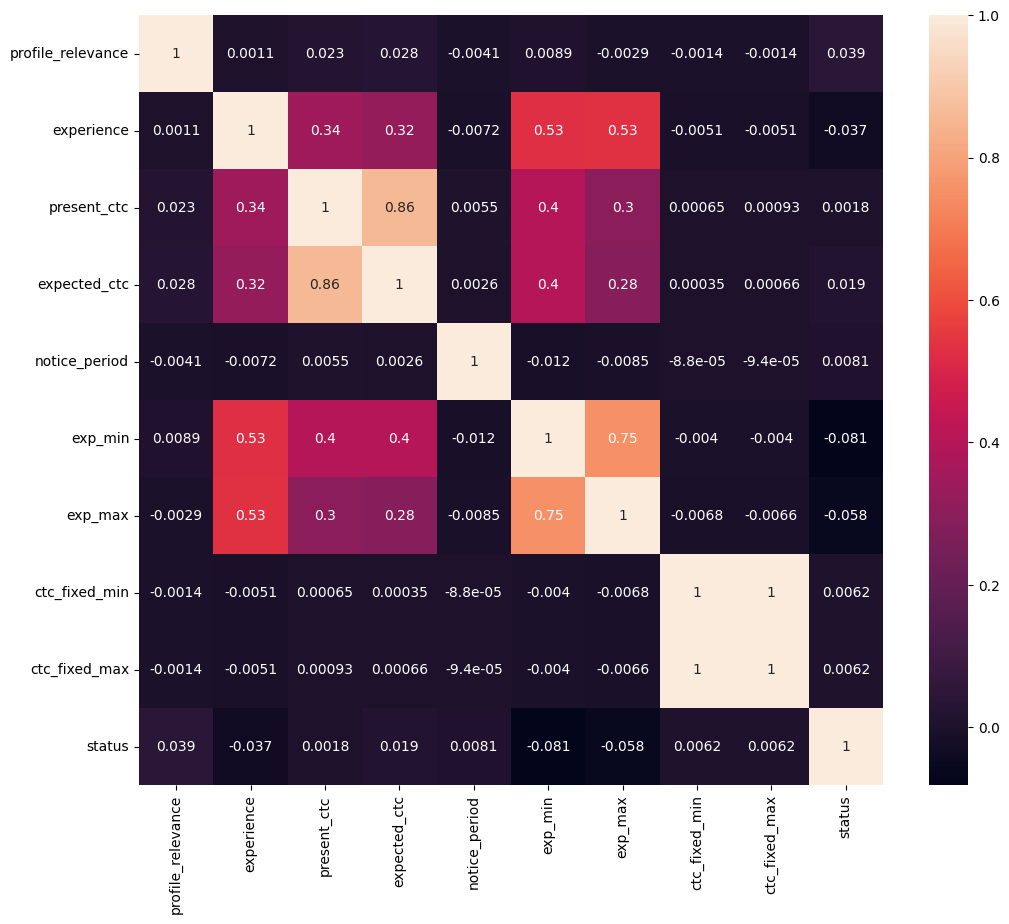

In [42]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [43]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

3

In [46]:
corr_features

{'ctc_fixed_max', 'exp_max', 'expected_ctc'}

In [45]:
correlations = X.corr()['status'].abs().sort_values(ascending=False)

In [47]:
correlations

status               1.000000
exp_min              0.080838
exp_max              0.058458
profile_relevance    0.039091
experience           0.036790
expected_ctc         0.019340
notice_period        0.008130
ctc_fixed_max        0.006219
ctc_fixed_min        0.006165
present_ctc          0.001837
Name: status, dtype: float64

## Feature Selection-Information gain - mutual information In Classification Problem Statements

In [52]:
X

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max,status
0,0.480256,2.00,3.6,4.14,15.0,0.5,3.0,3.0,5.0,0
1,0.437798,11.00,3.0,4.00,1.0,0.5,3.0,3.0,5.0,0
2,0.585832,2.50,5.0,5.75,15.0,2.0,4.0,6.0,10.0,0
3,0.581464,4.08,7.0,8.05,15.0,2.0,4.0,6.0,10.0,0
4,0.537166,3.50,4.0,8.00,1.0,1.0,5.0,6.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...
22458,0.454756,8.10,8.5,12.00,30.0,3.0,9.0,7.0,11.0,1
22459,0.548402,7.50,6.5,8.50,20.0,3.0,9.0,7.0,11.0,1
22460,0.648380,9.00,7.5,12.00,30.0,3.0,9.0,7.0,11.0,1
22461,0.808901,7.00,6.7,12.00,90.0,3.0,9.0,7.0,11.0,1


In [54]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X.iloc[:,:-1],X['status'])
mutual_info

array([1.72446298e-02, 0.00000000e+00, 8.26450561e-05, 2.64214312e-03,
       1.13818025e-03, 2.09407633e-03, 1.07753986e-03, 6.19981423e-03,
       1.83884809e-02])

In [56]:
scores = [1.72446298e-02, 0.00000000e+00, 8.26450561e-05, 2.64214312e-03, 1.13818025e-03, 2.09407633e-03, 1.07753986e-03, 6.19981423e-03, 1.83884809e-02]

feature_names = list(X.columns[:-1]) 

# Create a DataFrame to associate feature names with scores
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual_Info_Score': scores})

# Display the feature scores
print(feature_scores_df)

             Feature  Mutual_Info_Score
0  profile_relevance           0.017245
1         experience           0.000000
2        present_ctc           0.000083
3       expected_ctc           0.002642
4      notice_period           0.001138
5            exp_min           0.002094
6            exp_max           0.001078
7      ctc_fixed_min           0.006200
8      ctc_fixed_max           0.018388


## Fisher Score For Feature Selection

In [59]:
def fisher_score(X, y):
    unique_classes = np.unique(y)
    num_classes = len(unique_classes)
    num_features = X.shape[1] - 1  # Considering all columns except the last one as features
    fisher_scores = []

    for i in range(num_features):
        feature_values = X.iloc[:, i]
        feature_score = 0.0
        
        for cls in unique_classes:
            class_samples = X[y == cls].iloc[:, i]
            class_mean = np.mean(class_samples)
            
            within_class_variance = np.var(class_samples)
            overall_mean = np.mean(feature_values)
            between_class_variance = len(class_samples) * ((class_mean - overall_mean) ** 2)
            
            if within_class_variance != 0:
                feature_score += between_class_variance / within_class_variance
        
        fisher_scores.append(feature_score)

    return fisher_scores, X.columns[:-1].tolist()  # Return scores and feature names excluding the last column

# Assuming X is a DataFrame with features in X.iloc[:,:-1] and label in X['status']
# Calculate Fisher Scores and retrieve feature names
fisher_scores, feature_names = fisher_score(X.iloc[:,:-1], X['status'])

# Print Fisher Scores for each feature with names
for name, score in zip(feature_names, fisher_scores):
    print(f"Feature {name}: Fisher Score - {score:.2f}")

Feature profile_relevance: Fisher Score - 30.81
Feature experience: Fisher Score - 28.55
Feature present_ctc: Fisher Score - 0.07
Feature expected_ctc: Fisher Score - 7.35
Feature notice_period: Fisher Score - 2.23
Feature exp_min: Fisher Score - 129.40
Feature exp_max: Fisher Score - 67.54
Feature ctc_fixed_min: Fisher Score - 107155.05


The Fisher Scores highlight the discriminatory power of each feature in differentiating between accepted and rejected statuses.

Profile Relevance (30.81) and Experience (28.55) exhibit relatively high Fisher Scores. This suggests their significant ability to distinguish between accepted and rejected candidates, indicating their importance in the classification process.

Features Exp_Min (129.40), Exp_Max (67.54), CTC_Fixed_Min (107155.05), and CTC_Fixed_Max (86903.38) display notably higher Fisher Scores, emphasizing their substantial discriminatory power. These features are likely pivotal in discerning between the classes of accepted and rejected applications.

On the other hand, Present CTC (0.07), Expected CTC (7.35), and Notice Period (2.23) showcase lower Fisher Scores. This implies that these features might have lesser influence or contribute less significantly to differentiating between accepted and rejected applications compared to other features.

In essence, higher Fisher Scores signify features that wield more relevance and influence in distinguishing between accepted and rejected statuses in the dataset. Features with higher Fisher Scores are considered more vital or informative in determining the suitability of candidates for a particular job description.